# BIG DATA ANALYTICS
### Project 1

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt

sns.set(style="whitegrid", palette="muted", font_scale=1.1)
%matplotlib inline


In [2]:
data = pd.read_csv("cinema.csv")
data.head()

,Unnamed: 0,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,Runtime,content_rating,Country
0,0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,8.2,Comedy,Drama,Music,128,PG-13,USA
1,1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,108,PG,USA
2,2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,8.1,Biography,Drama,NaN,118,PG-13,Australia
3,3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,8.0,Drama,Mystery,Sci-Fi,116,PG-13,USA
4,4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,7.9,Drama,NaN,NaN,137,R,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              100 non-null    int64  
 1   Title                   100 non-null    object 
 2   title_year              100 non-null    int64  
 3   budget                  100 non-null    int64  
 4   Gross                   100 non-null    int64  
 5   actor_1_name            100 non-null    object 
 6   actor_2_name            100 non-null    object 
 7   actor_3_name            100 non-null    object 
 8   actor_1_facebook_likes  100 non-null    int64  
 9   actor_2_facebook_likes  99 non-null     float64
 10  actor_3_facebook_likes  98 non-null     float64
 11  IMDb_rating             100 non-null    float64
 12  genre_1                 100 non-null    object 
 13  genre_2                 97 non-null     object 
 14  genre_3                 74 non-null     obj

In [4]:
data['budget'] = pd.to_numeric(data['budget'], errors = 'coerce')
data['Gross']  = pd.to_numeric(data['Gross'], errors = 'coerce')
data['budget'] = data['budget']/1_000_000
data['Gross'] = data['Gross']/1_000_000


In [5]:
data.rename(columns = {'budget':'budget(million$)','Gross':'Gross(million$)'}, inplace = True)

In [6]:
data['profit'] = data['budget(million$)']-data['Gross(million$)']

In [7]:
top10 = data.sort_values(by = 'profit', ascending=False).head(10)
top10

,Unnamed: 0,Title,title_year,budget(million$),Gross(million$),actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,Runtime,content_rating,Country,profit
22,22,Hugo,2011,170.0,73.820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,7.5,Adventure,Drama,Family,126,PG,USA,96.179906
39,39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,7.8,Animation,Adventure,Drama,108,PG,France,79.860848
17,17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,7.9,Action,Adventure,Sci-Fi,113,PG-13,USA,77.810499
7,7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,7.8,Animation,Adventure,Comedy,124,PG,USA,59.192738
46,46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,7.5,Action,Comedy,Romance,112,PG-13,USA,28.505730
28,28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,7.8,Action,Adventure,Sci-Fi,132,PG-13,USA,13.594629
82,82,Flipped,2010,14.0,1.752214,Madeline Carroll,Rebecca De Mornay,Aidan Quinn,1000,872.0,767.0,7.7,Comedy,Drama,Romance,124,PG,USA,12.247786
66,66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,8.2,Action,Drama,Sport,140,PG-13,USA,11.348338
56,56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,8.1,Action,Biography,Drama,123,R,UK,11.096291
89,89,Amour,2012,8.9,0.225377,Isabelle Huppert,Emmanuelle Riva,Jean-Louis Trintignant,678,432.0,319.0,7.9,Drama,Romance,NaN,127,PG-13,France,8.674623


# It's time to visualize Budget vs Profit

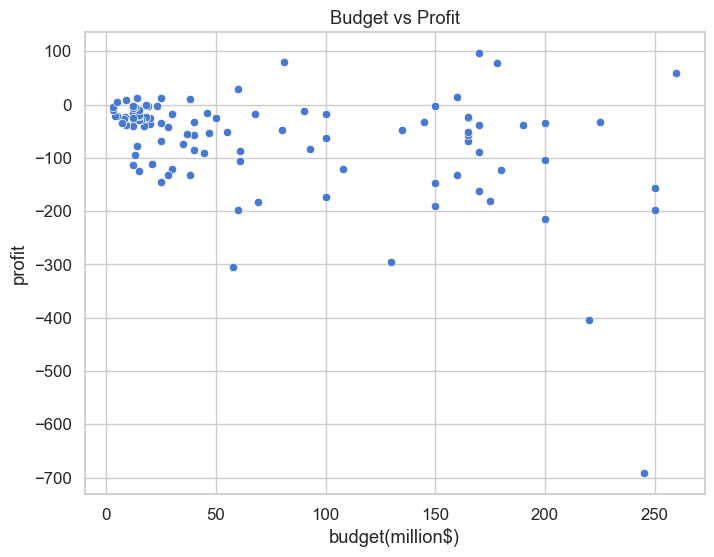

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='budget(million$)', y='profit')
plt.title('Budget vs Profit')
plt.show()

# Identifying Loss Making Movies

In [9]:
Neg_profit = data[data['profit']<0]
Neg_profit.shape

(89, 19)

## Genre Distribution Visualization

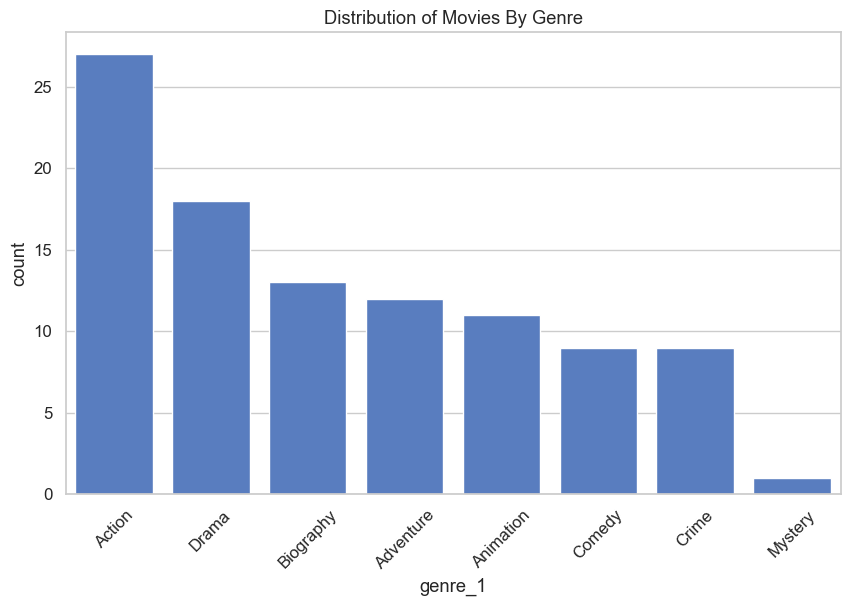

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='genre_1', order=data['genre_1'].value_counts().index)
plt.title('Distribution of Movies By Genre')
plt.xticks(rotation=45)
plt.show()

# SUMMARY
The dataset contains 100 movies released between 2010 and 2016.
The average budget was $97.68 million, with a range from $0.3 million to $260 million.
The highest profit was recorded by Star Wars: Episode VII – The Force Awakens.
The average profit observed was $72.87 million per movie.
A total of 14 movies incurred financial losses.
## *The Most Common Genres are :*
1. Action (22 films)
2. Animation (11 films)
3. Adventure (10 films)
4. Drama (10 films)
5. Comedy (8 films)
## The following movies were exceptional performers
1. Star Wars: Episode VII with the Highest profit margin
2. The Avengers: with an excellent return on investment
3. Animation films: Recorded Consistent profitability across multiple titles


